# Contents
 - [Imports](#Imports)
 - [Signac](#Signac)
 - [Old School](#OldSchool)
 - [Adsorption Isotherm](#Adsorption) (P v N)
 - [Number of Molecules vs. Chemical Potential](#NvMu) (N v $\mu$)
 - [Total Energy](#TotalEnergy)
 

# Interesting Etherpads
 - [7-30: New Sweeps](https://etherpad.boisestate.edu/p/ldrd-s20-12)

In [ ]:
# Quick commands
#!tail -n 1 workspace/*/surfequil*.prp
#!head -n 10 workspace/*/surfprod*.prp

<a id="Imports"></a>
## Imports

In [2]:
import mosdef_cassandra as mc
import generate_mc as gen   # Chris' script
import mbuild as mb
import foyer
import signac
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import random
from glob import glob
import unyt as u    # For Cassandra's physical unit specification 
                    # https://mosdef-cassandra.readthedocs.io/en/latest/guides/unyts.html

<a id="Signac"></a>
## Signac - Get Project

In [4]:
data_path = "/home/erjank_project/nealeellyson/MosCas/signac/"
project = signac.get_project(data_path)

In [5]:
state_dict={"chem_pot": [100,150,200,350,400,450,500,550,600], 
            "T": [66]}
job_list= project.find_jobs(state_dict)
#specify file type
for job in job_list:
    equilprp_path = job.fn('surfequil*.prp')        
    prodprp_path = job.fn('surfprod*.prp')


<a id="OldSchool"></a>
## Old School Data Retrieval 

In [16]:
T = 33
chem_pots = [100,150,200,350,400,450,600] #[33] #
temp = 2*T
pressures = []
nmols = []
prodprop = glob('signac/workspace/*/surfprod*.prp')

<a id="Adsorption"></a>
## Adsorption Isotherm

surfprod_100_66.out.prp
surfprod_150_66.out.prp
surfprod_200_66.out.prp
surfprod_350_66.out.prp
surfprod_400_66.out.prp
surfprod_450_66.out.prp
surfprod_600_66.out.prp


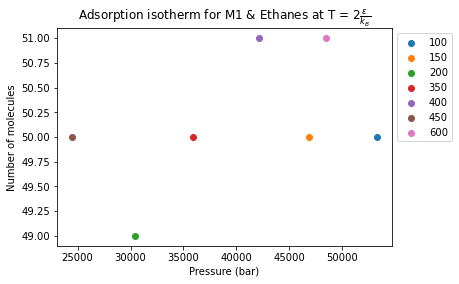

In [96]:
for file in (prodprop):
    print(file[-23:])
    a = np.loadtxt(file)
    pressure = np.mean(a[:,5])
    nmol = np.mean(a[:,8])
    plt.scatter(pressure,nmol, label = file[-14:-11])
    pressures.append(np.mean(a[:,5]))
    nmols.append(np.mean(a[:,8]))
plt.title(r"""Adsorption isotherm for M1 & Ethanes at T = 2$\frac{\epsilon}{k_{B}}$""")
plt.xlabel("Pressure (bar)")
plt.ylabel("Number of Molecules")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

In [19]:
f"signac/workspace/*/surfprod_{chem_pot:.0f}_{temp:.0f}.out.prp"
glob(f"signac/workspace/*/surfprod_{chem_pot:.0f}_{temp:.0f}.out.prp")
glob('signac/workspace/b4cb45ec06f7d6ce736a30a16a386274/surfprod_100_66.out.prp')
for file in prodprop:
    print(type(file))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


<a id="NvMu"></a>
## Number of Molecules, N, vs. Chemical Potential, $\mu$

surfprod_100_66.out.prp
surfprod_150_66.out.prp
surfprod_200_66.out.prp
surfprod_350_66.out.prp
surfprod_400_66.out.prp
surfprod_450_66.out.prp
surfprod_600_66.out.prp


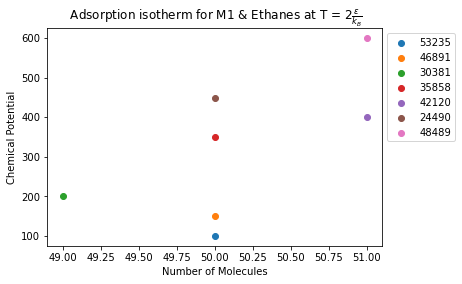

In [25]:
for chem_pot in chem_pots:
    file = glob(f"signac/workspace/*/surfprod_{chem_pot:.0f}_{temp:.0f}.out.prp")
    print(file[0][-23:])
    a = np.loadtxt(file[0])
    pressure = np.mean(a[:,5])
    nmol = np.mean(a[:,8])
    plt.scatter(nmol,chem_pot, label = f"{pressure:.0f}")

plt.title(r""" Adsorption isotherm for M1 & Ethanes at T = 2$\frac{\epsilon}{k_{B}}$""")
plt.xlabel("Number of Molecules")
plt.ylabel("Chemical Potential")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

<a id="TotalEnergy"></a>
## Total Energy

surfprod_100_66.out.prp


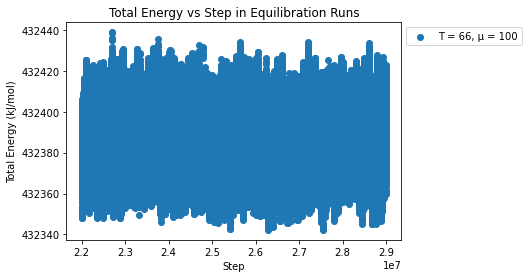

surfprod_150_66.out.prp


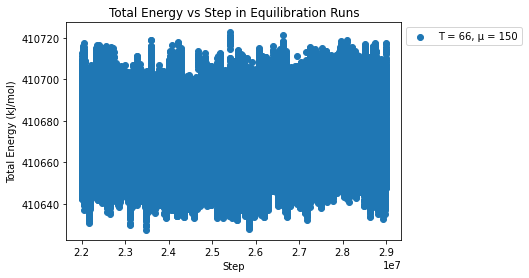

surfprod_200_66.out.prp


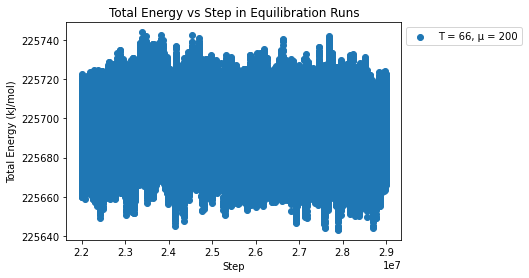

surfprod_350_66.out.prp


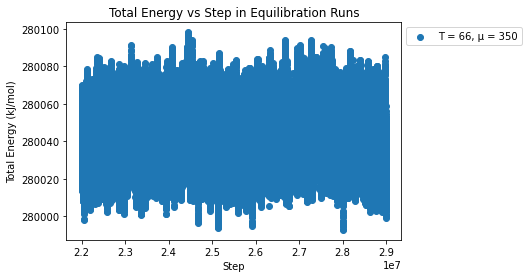

surfprod_400_66.out.prp


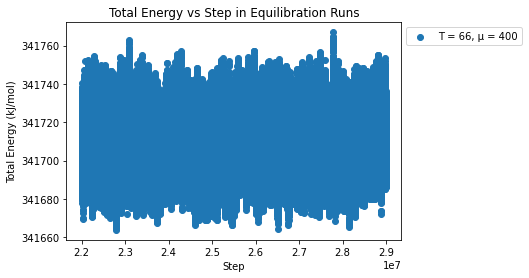

surfprod_450_66.out.prp


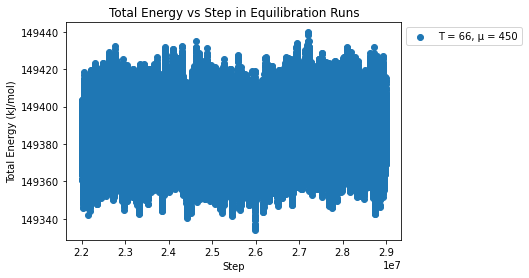

surfprod_600_66.out.prp


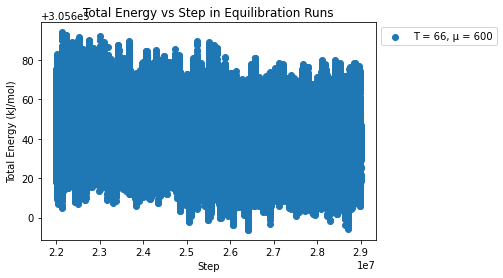

In [82]:
for file in (prodprop):
    print(file[-23:])
    a = np.loadtxt(file)
    plt.scatter(a[:,0],a[:,1], label=f"T = {temp:.0f}, μ = {file[-14:-11]}")
    plt.xlabel("Step")
    plt.ylabel("Total Energy (kJ/mol)")
    plt.title("Total Energy vs Step in Equilibration Runs")
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.show()